## Курсовой проект ##

#### Задача ####
На основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

#### Целевая переменная ####
Credit Default - факт невыполнения кредитных обязательств

#### Метрика качества ####
F1-score (sklearn.metrics.f1_score)

#### Требования к решению ####
Целевая метрика
F1 > 0.5
Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

from matplotlib import pyplot as plt
import seaborn as sbn

import warnings
warnings.filterwarnings('ignore')

In [2]:
# пути к файлам

TRAIN_DATASET_PATH = './data/train.csv'
TEST_DATASET_PATH = './data/test.csv'

SUBMITION_PATH = './data/sample_submission.csv'

### Описание датасета ###

<ul>
<li><strong>Home Ownership</strong> - домовладение</li>
<li><strong>Annual Income</strong> - годовой доход</li>
<li><strong>Years in current job</strong> - количество лет на текущем месте работы</li>
<li><strong>Tax Liens</strong> - налоговые обременения</li>
<li><strong>Number of Open Accounts</strong> - количество открытых счетов</li>
<li><strong>Years of Credit History</strong> - количество лет кредитной истории</li>
<li><strong>Maximum Open Credit</strong> - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)</li>
<li><strong>Number of Credit Problems</strong> - количество проблем с кредитом</li>
<li><strong>Months since last delinquent</strong> - количество месяцев с последней просрочки платежа</li>
<li><strong>Bankruptcies</strong> - банкротства</li>
<li><strong>Purpose</strong> - цель кредита</li>
<li><strong>Term</strong> - срок кредита</li>
<li><strong>Current Loan Amount</strong> - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)</li>
<li><strong>Current Credit Balance</strong> - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)</li>
<li><strong>Monthly Debt</strong> - ежемесячный долг</li>
<li><strong>Credit Score</strong> - баллы кредитного рейтинга</li>
<li><strong>Credit Default</strong> - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)</li>
</ul>

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
test_df = pd.read_csv(TEST_DATASET_PATH)
train_df.shape, test_df.shape

((7500, 17), (2500, 16))

### EDA ###

<AxesSubplot:xlabel='Credit Default', ylabel='count'>

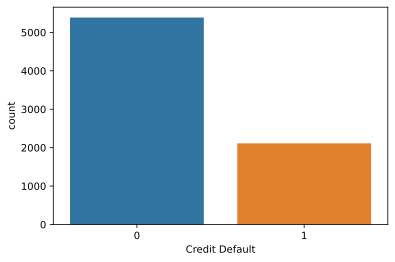

In [5]:
sbn.countplot(x=train_df['Credit Default'])

In [6]:
train_df.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

In [7]:
ALL_FEATURE_NAMES = ['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score']
TARGET_NAME = 'Credit Default'

ValueError: Image size of 1972080x360 pixels is too large. It must be less than 2^16 in each direction.

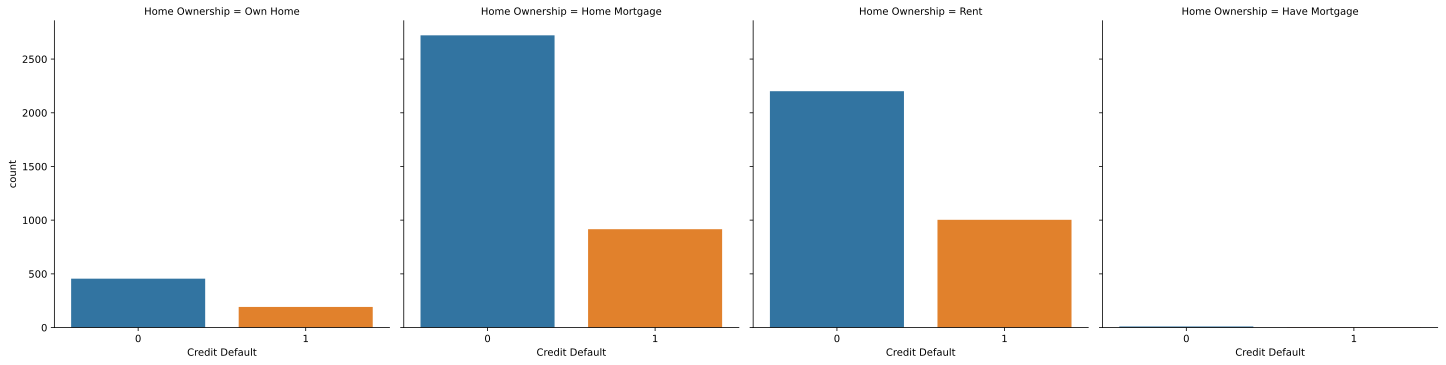

Error in callback <function flush_figures at 0x7f62a44ff9d0> (for post_execute):


KeyboardInterrupt: 

In [8]:
for feature in ALL_FEATURE_NAMES:
    sbn.factorplot(x=TARGET_NAME, col=feature, kind='count', data=train_df)